# Pipeline for analysing open clusters based on Gaia EDR3 data

## 1 - Libraries

In [1]:
#%matplotlib notebook

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy
import astropy.stats as ap

from math import pi, ceil, floor
from astropy import units
from astropy.table import Table
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from IPython.display import display, HTML

## 2 - Query Gaia EDR3 Catalog

In [152]:
# Gaia EDR3 catalog on VizieR
# see https://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/345/gaia2
cat = '	I/350/gaiaedr3'
cols = ['_r', 'EDR3Name', 'RAdeg', 'DEdeg', 'Plx', 'e_Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-G']
row_lim = 1000
timeout = 600
uns = [['h','m','s'],['d','m','s']]

#Query the GDR2 data for one cluster
def query(name, ra_deg, de_deg, rad_deg, filter_map, max_stars = 1000):
    print("Querying VizieR for %s ..." % name)
    coo = SkyCoord(ra = ra_deg*units.degree, dec = de_deg*units.degree, frame = 'icrs')
    viz = Vizier(columns = cols, column_filters = filter_map, row_limit = row_lim, timeout = timeout)
    viz_res = viz.query_region(coo, radius = rad_deg*units.degree, catalog = cat)
    if viz_res == None or len(viz_res) == 0:
        print(viz_res)
        return pd.DataFrame() #Empty Dataframe
    df = viz_res[0].to_pandas()
    df = df.set_index('EDR3Name')
    df = df.sort_values(by='Gmag')
    df = df[:max_stars]
    df = df.sort_values(by='_r')
    if not df.empty:
        #display(df.head())
        display(df.describe())
    else:
        print('Empty dataframe! - try again with another set of parameters')
    return df

# convert sexagesimal to decimal coordinates
def convert(_ra, _dec, diam):
    comps = list(zip(_ra.split(' '),uns[0]))
    ra = ''.join([item for sublist in comps for item in sublist])
    comps = list(zip(_dec.split(' '),uns[1]))
    dec = ''.join([item for sublist in comps for item in sublist])
    c = SkyCoord(ra, dec, frame='icrs')
    return c.ra.value, c.dec.value, diam / 120

filters = {'Plx' : '-0.3..2', 'e_Plx' : '<0.8', 'pmRA' : '-10..10', 'pmDE' : '-10..10', 'Gmag' : '<19.75'}

# PUT THE INPUT HERE IF YOU WANT TO ENTER SEXAGESIMAL COORDINATES AND DIAM IN ARCMIN
#cl_name, cl_ra_sexa, cl_de_sexa, diam_arcmin = 'Alessi_62', '18 56 06.2', '+21 35 49', 36

cl_name, cl_ra_sexa, cl_de_sexa, diam_arcmin = 'Teutsch 148      ', '19 10 27.0', '+10 18 34',   1.2


cl_ra, cl_de, radius = convert(cl_ra_sexa, cl_de_sexa, diam_arcmin)

# PUT THE INPUT HERE IF YOU WANT TO ENTER DECIMAL COORDINATES IN DEGREES AND RADIUS IN DEGREES
#cl_name, cl_ra, cl_de, radius = 'Alessi_62', 284.026, +21.597, 0.256

#cl_name, cl_ra, cl_de, radius = 'Kronberger_100', 143.977917, -54.030278,  0.0133
#cl_name, cl_ra, cl_de, radius = 'Kronberger_106', 156.838333, -55.111389,  0.02410
#cl_name, cl_ra, cl_de, radius = 'Kronberger_113', 160.791250, -62.669722,  0.01000
#cl_name, cl_ra, cl_de, radius = 'Kronberger_119', 161.812500, -63.327778,  0.02
#cl_name, cl_ra, cl_de, radius = 'Kronberger_134', 170.884167, -60.533056,  0.015
#cl_name, cl_ra, cl_de, radius = 'Kronberger_137', 172.900833, -61.525278,  0.0177
#cl_name, cl_ra, cl_de, radius = 'Kronberger_143', 179.427500, -64.177778,  0.015
#cl_name, cl_ra, cl_de, radius = 'Patchick_121',   144.839583, -52.250278,  0.03 #0.01167
#cl_name, cl_ra, cl_de, radius = 'Patchick_122',   145.627917, -52.428056,  0.0137
#cl_name, cl_ra, cl_de, radius = 'Strottner_1',    146.838750, -53.503889,  0.0115
#cl_name, cl_ra, cl_de, radius = 'Kronberger_122', 165.124167, -58.841944,  0.027
#cl_name, cl_ra, cl_de, radius = 'Patchick_123',   182.579167, -63.879167,  0.012

df = query(cl_name, cl_ra, cl_de, radius, filters)
#df.head

Querying VizieR for Teutsch 148       ...


,_r,_RAJ2000,_DEJ2000,Plx,e_Plx,pmRA,pmDE,Gmag,BP-G
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,35.000000
mean,0.005217,287.612293,10.309220,0.249459,0.158103,-1.445216,-3.813514,17.808797,1.464675
std,0.002897,0.004533,0.004044,0.177429,0.102792,1.120920,1.281169,1.390929,0.536415
min,0.000252,287.603869,10.301717,-0.146800,0.015900,-4.622000,-7.122000,13.518253,0.572094
25%,0.002633,287.609400,10.307206,0.116800,0.083200,-1.479000,-3.881000,17.248434,1.106268
50%,0.004551,287.611579,10.308885,0.286700,0.135700,-1.192000,-3.515000,17.990587,1.267866
75%,0.007616,287.614066,10.311099,0.373200,0.196500,-1.089000,-3.417000,18.779793,1.524348
max,0.009759,287.622244,10.318762,0.582000,0.427400,0.971000,-0.601000,19.738903,2.886290


## 3 - VPD scatter plot and 2D Histogram (returning PMs for the bin with highest count)

Teutsch 148      ;  0.313; 0.073;  -1.179;  0.090;  -3.471;  0.094;   27; 13.52..19.74


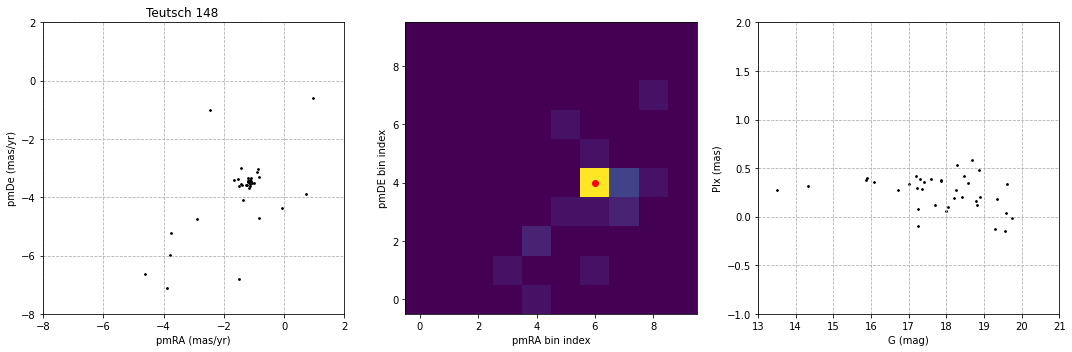

In [153]:
## determine limits for dimensioning the VPD
def pm_limits(pmras, pmdes):
    max_pm = ceil(np.max([np.max(pmras), np.max(pmdes)])+0.5)
    min_pm = floor(np.min([np.min(pmras), np.min(pmdes)])-0.5)
    return min_pm, max_pm
 
def plx_limits(plxs):
    max_plx = ceil(np.max(plxs)+0.5)
    min_plx = floor(np.min(plxs)-0.5)
    return min_plx, max_plx

def mag_limits(gmags):
    max_gmag = ceil(np.max(gmags)+0.5)
    min_gmag = floor(np.min(gmags)-0.5)
    return min_gmag, max_gmag

# Build a VPD (Vector Proper Motion Diagram) scatter plot
def plot_VPD(data, title):
    pmras = data['pmRA']
    pmdes = data['pmDE']
    xs, ys = pmras, pmdes
    plt.title(title)
    plt.xlabel('pmRA (mas/yr)')
    plt.ylabel('pmDe (mas/yr)')
    min_pm, max_pm = pm_limits(pmras, pmdes)
    plt.xlim(min_pm, max_pm)
    plt.ylim(min_pm, max_pm)
    plt.grid(True, linestyle='dashed')
    plt.scatter(xs, ys, s=3, color='black')

# Calculates the median parallax of the stars within <limit> of the estimated pms
def calculate_estimates(data, est_pmra, est_pmde, limit = 1.25):
    def filter_pms(pmra, pmde):
        return (abs(est_pmra - pmra) < limit) and (abs(est_pmde - pmde) < limit)
    filter_fn = lambda x: filter_pms(x['pmRA'], x['pmDE'])
    data = data[data.apply(filter_fn, axis = 1)]
    plxs = data['Plx']
    pmra = data['pmRA']
    pmde = data['pmDE']
    gmag = data['Gmag']
    plx, err_plx = np.median(plxs), ap.median_absolute_deviation(plxs)
    pmra, err_pmra = np.median(pmra), ap.median_absolute_deviation(pmra)
    pmde, err_pmde = np.median(pmde), ap.median_absolute_deviation(pmde)
    gmin, gmax = np.min(gmag), np.max(gmag)
    return data, plx, err_plx, pmra, err_pmra, pmde, err_pmde, gmin, gmax, len(plxs)

# Build 2D histogram for proper motions and returns average PMs for the bin with the highest count
def plot_pm_hist(data, num_bins = 10):
    xs = data['pmRA']
    ys = data['pmDE']
    min_pm, max_pm = pm_limits(xs, ys)
    _range = [[min_pm, max_pm], [min_pm, max_pm]]
    counts, xedges, yedges = np.histogram2d(xs, ys, bins = num_bins, range = _range)
    x_ind, y_ind = np.unravel_index(np.argmax(counts), counts.shape)
    est_pmRA = (xedges[x_ind] + xedges[x_ind+1]) / 2
    est_pmDe = (yedges[y_ind] + yedges[y_ind+1]) / 2
    plt.imshow(counts.T, origin = 'lower')
    plt.xlabel('pmRA bin index')
    plt.ylabel('pmDE bin index')
    plt.plot(x_ind, y_ind, 'or')
    #stars, plx, err_plx, pmra, err_pmra, pmde, err_pmde, gmin, gmax, n = calculate_estimates(data, est_pmRA, est_pmDe)
    #return plx, err_plx, pmra, err_pmra, pmde, err_pmde, gmin, gmax, n
    return calculate_estimates(data, est_pmRA, est_pmDe)

# Build G mag X Parallax scatter plot
def plot_mag_par(data):
    plxs = data['Plx']
    gmags = data['Gmag']
    min_gmag, max_gmag = mag_limits(gmags)
    min_plx, max_plx = plx_limits(plxs)
    xs, ys = gmags, plxs
    plt.xlabel('G (mag)')
    plt.ylabel('Plx (mas)')
    plt.xlim(min_gmag, max_gmag)
    plt.ylim(min_plx, max_plx)
    plt.grid(True, linestyle='dashed')
    plt.scatter(xs, ys, s=3, color='black')

# plot both graphics side-by-side
def plot_step1(data, cl_name):
    fig = plt.figure(figsize=(15,5))
    plt.subplot(131)
    plot_VPD(data, cl_name)
    plt.subplot(132)
    stars, plx, err_plx, pmra, err_pmra, pmde, err_pmde, gmin, gmax, n = plot_pm_hist(data)
    plt.subplot(133)
    plot_mag_par(data)
    plt.tight_layout()
    return stars, plx, err_plx, pmra, err_pmra, pmde, err_pmde, gmin, gmax, n

stars, est_plx, err_plx, est_pmRA, err_pmRA, est_pmDe, err_pmDe, gmin, gmax, n = plot_step1(df, cl_name)
#estimates = f'{cl_name:<15}; {cl_ra:9.6f}; {cl_de:+9.6f}; {radius:8.5f};  '
estimates = f'{cl_name:<15};  '
estimates += f'{est_plx:5.3f}; {err_plx:5.3f}; {est_pmRA:7.3f};{err_pmRA:7.3f}; {est_pmDe:7.3f};{err_pmDe:7.3f};'
estimates += f'{n:>5}; {gmin:5.2f}..{gmax:5.2f}'
print(estimates)

## 4 - Query another area constrained by the estimated values

Querying VizieR for Alessi J1816-1529  ...


,_r,_RAJ2000,_DEJ2000,Plx,e_Plx,pmRA,pmDE,Gmag,BP-G
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,845.000000
mean,0.628222,274.029715,-15.584506,0.565377,0.028343,-0.112161,-1.499588,12.082834,0.662050
std,0.251774,0.505206,0.456653,0.109082,0.026819,0.810948,0.968440,0.781666,0.752130
min,0.001781,273.041865,-16.472472,0.320500,0.012900,-2.121000,-3.474000,9.360505,-0.624063
25%,0.441607,273.641479,-15.924344,0.497600,0.017200,-0.696500,-2.215000,11.683435,0.197801
50%,0.667910,274.017639,-15.596272,0.577100,0.020300,-0.074000,-1.452000,12.325476,0.344952
75%,0.843019,274.381825,-15.235180,0.642200,0.026650,0.424000,-0.860000,12.680031,0.880116
max,0.999895,275.084989,-14.545091,0.777300,0.319800,1.688000,0.681000,12.958737,4.719029


,_r,_RAJ2000,_DEJ2000,Plx,e_Plx,pmRA,pmDE,Gmag,BP-G
EDR3Name,,,,,,,,,
Gaia EDR3 4146144931163852800,0.001781,274.068516,-15.476318,0.5955,0.0161,1.025,-1.549,12.121542,0.189154
Gaia EDR3 4146144858128732544,0.011073,274.078076,-15.475034,0.6036,0.0192,0.427,-0.859,12.849410,0.203342
Gaia EDR3 4146144656285933184,0.023447,274.086862,-15.489467,0.5999,0.0209,-0.385,-0.944,9.967369,0.055455
Gaia EDR3 4146144484487262464,0.036461,274.032768,-15.492556,0.3863,0.0193,-0.701,0.185,12.642575,1.010896
Gaia EDR3 4146145236085855104,0.046649,274.018906,-15.483912,0.4834,0.0306,-0.208,-2.140,11.469748,0.102097
Gaia EDR3 4146145339165069312,0.047558,274.017639,-15.471053,0.5719,0.0245,-0.626,-2.067,12.100970,0.131921
Gaia EDR3 4146144106530119808,0.064730,274.039215,-15.535451,0.5891,0.0187,0.202,-1.848,12.713404,0.187575
Gaia EDR3 4146146030675523072,0.066119,274.021179,-15.426893,0.4625,0.0230,0.934,-0.217,12.942958,0.349401
Gaia EDR3 4146147611223034752,0.067010,274.073416,-15.409692,0.5535,0.0162,0.876,0.525,12.494200,0.306592


(                                     _r    _RAJ2000   _DEJ2000     Plx  \
 EDR3Name                                                                 
 Gaia EDR3 4146144858128732544  0.011073  274.078076 -15.475034  0.6036   
 Gaia EDR3 4146144656285933184  0.023447  274.086862 -15.489467  0.5999   
 Gaia EDR3 4146144484487262464  0.036461  274.032768 -15.492556  0.3863   
 Gaia EDR3 4146145236085855104  0.046649  274.018906 -15.483912  0.4834   
 Gaia EDR3 4146145339165069312  0.047558  274.017639 -15.471053  0.5719   
 ...                                 ...         ...        ...     ...   
 Gaia EDR3 4097645537665273856  0.992019  274.014003 -16.467104  0.6350   
 Gaia EDR3 4097649076718282880  0.996479  273.883297 -16.457135  0.3310   
 Gaia EDR3 4097651207022105344  0.996585  274.034138 -16.472472  0.6421   
 Gaia EDR3 4097660832066324480  0.996703  273.703485 -16.409898  0.4243   
 Gaia EDR3 4146438805690011392  0.998455  273.447696 -14.676561  0.7141   
 
                       

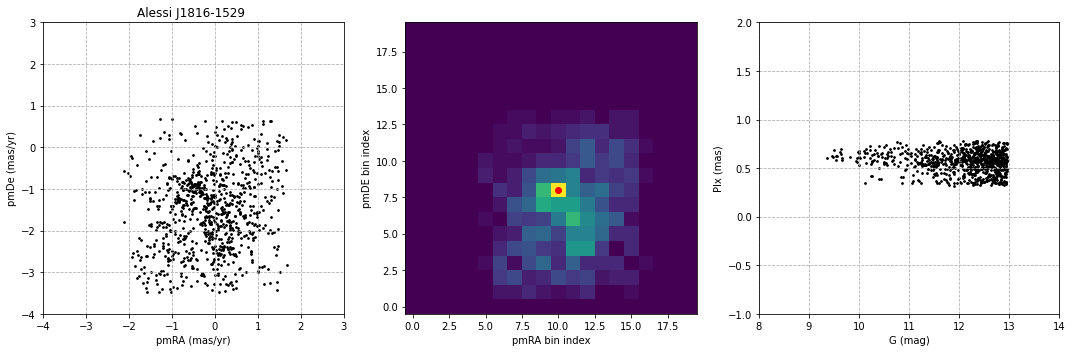

In [14]:
def constrained_query(name, ra_deg, de_deg, rad, est_pmRA, est_pmDe, est_plx, mul_pm=4, mul_px=4, mul_rad=4):
    plx_lim = (est_plx - mul_px*err_plx, est_plx + mul_px*err_plx)
    plx_range = f'{plx_lim[0]:.2f}..{plx_lim[1]:.2f}'
    pmRA_lim = (est_pmRA - mul_pm*err_pmRA, est_pmRA + mul_pm*err_pmRA)
    pmRA_range = f'{pmRA_lim[0]:.2f}..{pmRA_lim[1]:.2f}'
    pmDe_lim = (est_pmDe - mul_pm*err_pmDe, est_pmDe + mul_pm*err_pmDe)
    pmDe_range = f'{pmDe_lim[0]:.2f}..{pmDe_lim[1]:.2f}'
    gmag_range = f'{gmin:.2f}..{gmax:.2f}'
    filters2 = {'Plx' : plx_range, 'pmRA' : pmRA_range, 'pmDE' : pmDe_range, 'Gmag' : gmag_range}
    #print(filters2)
    return query(name, ra_deg, de_deg, rad*mul_rad, filters2, max_stars = row_lim)
    
df2 = constrained_query(cl_name, cl_ra, cl_de, radius, est_pmRA, est_pmDe, est_plx)

df2.head
display(HTML(df2.to_html()))

plot_step1(df2, cl_name)

## 5 - Chart  and RDP scatter plot (constrained by the estimated values)

(-0.00021700000000000007, 0.102]     14
(0.102, 0.201]                       41
(0.201, 0.301]                       62
(0.301, 0.401]                       69
(0.401, 0.501]                       77
(0.501, 0.601]                       93
(0.601, 0.7]                        103
(0.7, 0.8]                          123
(0.8, 0.9]                          125
(0.9, 1.0]                          140
Name: _r, dtype: int64


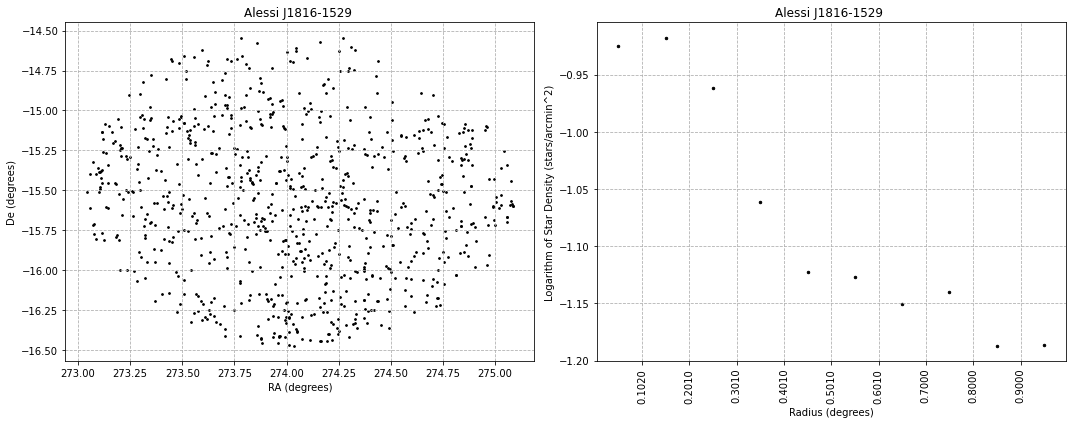

In [15]:

# Build chart scatter plot
def plot_chart(data, title):
    xs, ys = data['_RAJ2000'], data['_DEJ2000']
    plt.title(title)
    plt.xlabel('RA (degrees)')
    plt.ylabel('De (degrees)')
    plt.grid(True, linestyle='dashed')
    plt.scatter(xs, ys, s=3, color='black')

# Build RDP (Radial Density Profile) scatter plot
def plot_RDP(data, title = None):
    bins = data['_r'].value_counts(bins=10).sort_index()
    intervals = bins.index.to_tuples()
    midpoints = [i.mid for i in bins.index]
    counts = bins.values
    zipped = tuple(zip(intervals, midpoints, counts))
    densities = [count / ring_area(inner*60, outer*60) for ((inner, outer), midpoint, count) in zipped]
    log_dens = [np.log10(dens) if dens > 0 else 0 for dens in densities]
    print(bins)
    #print(intervals)
    #print(midpoints)
    #print(counts)
    #print(zipped)
    plt.grid(True, linestyle='dashed')
    plt.title(title)
    plt.xlabel('Radius (degrees)')
    plt.xticks([i for i,j in intervals], rotation='vertical')
    plt.ylabel('Logarithm of Star Density (stars/arcmin^2)')
    plt.scatter(midpoints, log_dens, s=6, color='black')

# plot both graphics side-by-side
def plot_step2(data, cl_name):
    fig = plt.figure(figsize=(15,6))
    plt.subplot(121)
    plot_chart(data, cl_name)
    plt.subplot(122)
    plot_RDP(data, cl_name)
    plt.tight_layout()

def ring_area(inner_rad, outer_rad):
    return pi * (outer_rad**2 - inner_rad**2)
    
plot_step2(df2, cl_name)


## 6 - CMD

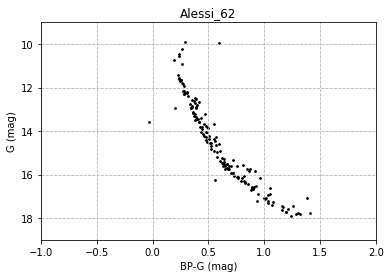

In [210]:
# Build G mag X Parallax scatter plot
def plot_mag_par(data, title = None):
    plxs = data['Plx']
    gmags = data['Gmag']
    min_gmag, max_gmag = mag_limits(gmags)
    min_plx, max_plx = plx_limits(plxs)
    xs, ys = gmags, plxs
    if title:
        plt.title(title)
    plt.xlabel('G (mag)')
    plt.ylabel('Plx (mas)')
    plt.xlim(min_gmag, max_gmag)
    plt.ylim(min_plx, max_plx)
    plt.grid(True, linestyle='dashed')
    plt.scatter(xs, ys, s=3, color='black')

# Build CMD (Color-Magnitude Diagram) scatter plot
def plot_CMD(data, title = None):
    gmags = data['Gmag']
    colors = data['BP-G']
    min_gmag, max_gmag = mag_limits(gmags)
    min_color, max_color = mag_limits(colors)
    xs, ys = colors, gmags
    if title:
        plt.title(title)
    plt.xlabel('BP-G (mag)')
    plt.ylabel('G (mag)')
    plt.xlim(min_color, max_color)
    plt.ylim(max_gmag, min_gmag)
    plt.grid(True, linestyle='dashed')
    plt.scatter(xs, ys, s=3, color='black')

chosen_lim_radius = 1.15 #choose one based on the RDP printed above
df3 = df2[df2['_r'] < chosen_lim_radius]
#plot_mag_par(df3, cl_name)
plot_CMD(df3, cl_name)
